#Clustering With K Means

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler


In [2]:
income = pd.read_excel('incomes.xlsx')
income.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Christopher,29,61000
3,Ismail,28,60000
4,Armand,42,150000


Text(0, 0.5, 'Income')

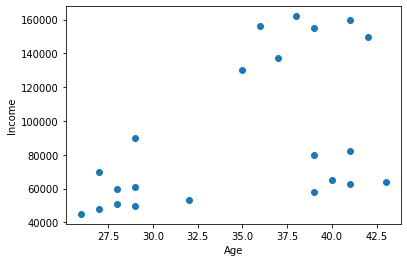

In [3]:
## Plotting the income as function of age:

plt.scatter(income.Age, income['Income($)'])
plt.xlabel('Age')
plt.ylabel("Income")

In [4]:
## Building the clusters...
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(income[['Age','Income($)']])
y_predicted

array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2])

In [5]:
income['cluster'] = y_predicted
display(income)

,Name,Age,Income($),cluster
0,Rob,27,70000,0
1,Michael,29,90000,0
2,Christopher,29,61000,2
3,Ismail,28,60000,2
4,Armand,42,150000,1
5,Richard,39,155000,1
6,David,41,160000,1
7,Andrea,38,162000,1
8,Brad,36,156000,1
9,Angelina,35,130000,1


In [6]:
## Centroid's positions:
km.cluster_centers_

array([[3.40000000e+01, 8.05000000e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.29090909e+01, 5.61363636e+04]])

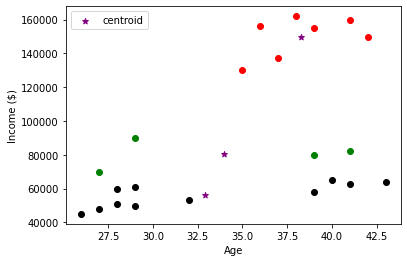

In [7]:
## Plotting each clusters:

df1 = income[income.cluster==0]
df2 = income[income.cluster==1]
df3 = income[income.cluster==2]

plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()

## Preprocessing using min and max scaler

In [8]:
scaler = MinMaxScaler()

scaler.fit(income[['Income($)']])
income['Income($)'] = scaler.transform(income[['Income($)']])

scaler.fit(income[['Age']])
income['Age'] = scaler.transform(income[['Age']])

display(income)

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Christopher,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Armand,0.941176,0.897436,1
5,Richard,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


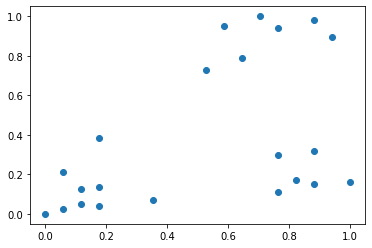

In [9]:
## Plotting the renormalized scatter plot

plt.scatter(income.Age, income['Income($)'])

In [10]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(income[['Age','Income($)']])
y_predicted

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2])

In [11]:
income['cluster']=y_predicted
display(income)

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Christopher,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Armand,0.941176,0.897436,0
5,Richard,0.764706,0.940171,0
6,David,0.882353,0.982906,0
7,Andrea,0.705882,1.000000,0
8,Brad,0.588235,0.948718,0
9,Angelina,0.529412,0.726496,0


In [12]:
## New centroids' positions

km.cluster_centers_

array([[0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

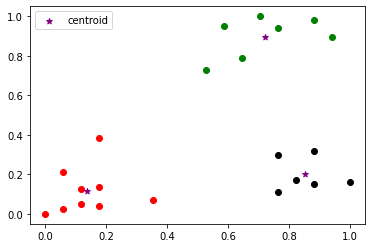

In [13]:
df1 = income[income.cluster==0]
df2 = income[income.cluster==1]
df3 = income[income.cluster==2]

plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

## Elbow plot

In [14]:
sse = []
k_rng = range(1,20)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(income[['Age','Income($)']])
    sse.append(km.inertia_)

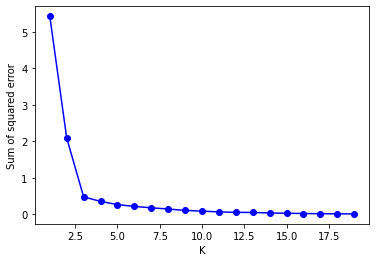

In [15]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng, sse, 'o-b')